## Evaluation

In [55]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#dataset
from sklearn.datasets import load_digits

digits = load_digits()
x,y  = digits.data, digits.target



In [56]:
# binary class creator
y_binary = y.copy()
y_binary[y_binary!= 1]= 0

#train test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y_binary, random_state=0)

#most frequent class
np.bincount(y_binary)

array([1615,  182], dtype=int64)

In [57]:
#score check using svm
from sklearn.svm import SVC

kernal = ['rbf','linear']
for i in kernal:
    model= SVC(kernel=i,C=1).fit(xtrain, ytrain)
    print("for {} kernal the scores are:".format(i))
    print("The test score  is  {}".format( model.score(xtest, ytest)))
    print("The train score  is  {}".format( model.score(xtrain, ytrain)))
    print('*'*50)


for rbf kernal the scores are:
The test score  is  0.9955555555555555
The train score  is  0.9992576095025983
**************************************************
for linear kernal the scores are:
The test score  is  0.9777777777777777
The train score  is  1.0
**************************************************


In [58]:
#dummy classifier score check
from sklearn.dummy import DummyClassifier
strategy = ['stratified','most_frequent','uniform']
for i in strategy:
    
    Dmodel= DummyClassifier(strategy = i).fit(xtrain, ytrain)
    score = Dmodel.score(xtest, ytest)
    print("Test score for {} strategy is {}.".format(i,score))
    print('*'*50)


Test score for stratified strategy is 0.8222222222222222.
**************************************************
Test score for most_frequent strategy is 0.9044444444444445.
**************************************************
Test score for uniform strategy is 0.5.
**************************************************


## Confusion matrix

In [59]:
from sklearn.metrics import confusion_matrix

# we know 0 is most important class

dummy_majority = DummyClassifier(strategy = 'stratified').fit(xtrain,ytrain)
du_majority = dummy_majority.predict(xtest)

confusion = confusion_matrix(du_majority,ytest)
print(" the confusion matrix for most frequent strategy is \n{}".format(confusion))


 the confusion matrix for most frequent strategy is 
[[367  33]
 [ 40  10]]


In [60]:
# confusion metrix using svm classifier
model = SVC(kernel='linear', C=1).fit(xtrain,ytrain)
sv_majority = model.predict(xtest)
confusion = confusion_matrix(sv_majority, ytest)
print("The confusion matrix for svm classifier is \n{}".format(confusion))

The confusion matrix for svm classifier is 
[[402   5]
 [  5  38]]


In [61]:
#confusion matrix with logistic regression classifier
from sklearn.linear_model import LogisticRegression
model_lr =LogisticRegression(max_iter=2000).fit(xtrain,ytrain)
lr_majority = model_lr.predict(xtest)
confusion = confusion_matrix(lr_majority, ytest)
print("The confusion matrix for LR classifier is \n{}".format(confusion))

The confusion matrix for LR classifier is 
[[403   7]
 [  4  36]]


In [62]:
#confusion matrix with Decision tree classifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4).fit(xtrain,ytrain)
dt_majority = model.predict(xtest)
confusion = confusion_matrix(dt_majority, ytest)
print("The confusion matrix for Decision tree classifier is \n{}".format(confusion))


The confusion matrix for Decision tree classifier is 
[[405   9]
 [  2  34]]


## Evaluation matrix for binary class claassification

In [63]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

print("Accuracy score is {}".format(accuracy_score(dt_majority,ytest)))
print('*'*50)
print("Precision score is {}".format(precision_score(dt_majority,ytest)))
print('*'*50)
print("F1 score is {}".format(f1_score(dt_majority,ytest)))
print('*'*50)
print("Recall score is {}".format(recall_score(dt_majority,ytest)))


Accuracy score is 0.9755555555555555
**************************************************
Precision score is 0.7906976744186046
**************************************************
F1 score is 0.8607594936708861
**************************************************
Recall score is 0.9444444444444444


In [64]:
# classification report
from sklearn.metrics import classification_report

print("Report for dummy classifier \n{}".format(classification_report(ytest,du_majority,target_names = ['not 1', '1'])))
print('*'*60)
print("Report for SVC classifier \n{}".format(classification_report(ytest,sv_majority,target_names = ['not 1', '1'])))
print('*'*60)    
print("Report for LR classifier \n{}".format(classification_report(ytest,lr_majority,target_names = ['not 1', '1'])))
print('*'*60)            
print("Report for DT classifier \n{}".format(classification_report(ytest,dt_majority,target_names = ['not 1', '1'])))


Report for dummy classifier 
              precision    recall  f1-score   support

       not 1       0.92      0.90      0.91       407
           1       0.20      0.23      0.22        43

    accuracy                           0.84       450
   macro avg       0.56      0.57      0.56       450
weighted avg       0.85      0.84      0.84       450

************************************************************
Report for SVC classifier 
              precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

************************************************************
Report for LR classifier 
              precision    recall  f1-score   support

       not 1       0.98      0.99      0.99       407
           1       0.90      0.84

## Decision function

In [66]:
#score of decision function
xtrain, xtest,ytrain, ytest = train_test_split(x,y_binary, random_state=0)

y_score = model_lr.fit(xtrain, ytrain).decision_function(xtest)
y_score_list = list(zip(ytest[0:20], y_test[0:20]))
y_score_list

[(0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (1, True),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (0, False),
 (1, True),
 (0, False),
 (0, False),
 (0, False)]

In [67]:
#probability function 
xtrain, xtest,ytrain, ytest = train_test_split(x,y_binary, random_state=0)

y_prob = model_lr.fit(xtrain, ytrain).predict_proba(xtest)
y_prob_list = list(zip(ytest[0:20], y_prob[0:20,1]))
y_prob_list

[(0, 9.173032243841126e-16),
 (0, 1.5073807783618196e-08),
 (0, 7.66430836296835e-10),
 (0, 1.0301162451194911e-16),
 (0, 8.260804378469168e-18),
 (0, 6.436382593925927e-09),
 (1, 0.9975370397728834),
 (0, 6.1507996587134654e-15),
 (0, 3.87272281231545e-16),
 (0, 5.989365362652524e-17),
 (0, 1.3395794006003114e-11),
 (0, 5.066656876054566e-10),
 (0, 1.3921196401965621e-16),
 (0, 1.2178411746261395e-07),
 (0, 2.6576355503260134e-06),
 (0, 1.0949675009968178e-06),
 (1, 0.9999996138585566),
 (0, 7.718050573708497e-18),
 (0, 4.6032498059931175e-12),
 (0, 4.471257876599848e-13)]

## Precision recall curve 

<IPython.core.display.Javascript object>


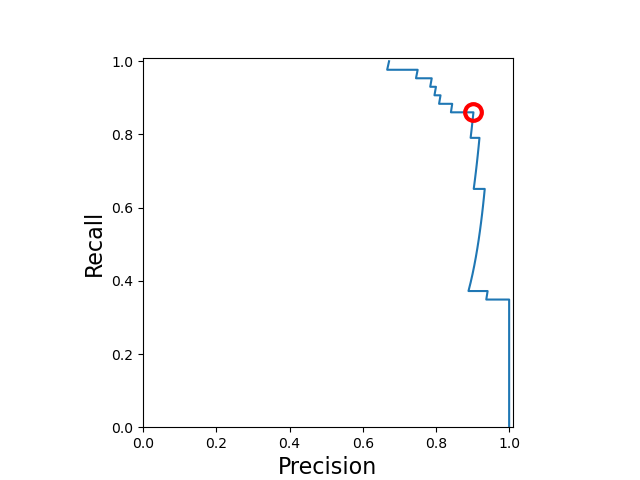

c:\users\rohit joshi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


In [68]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(ytest, y_score)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

## ROC curve and AUC

<IPython.core.display.Javascript object>


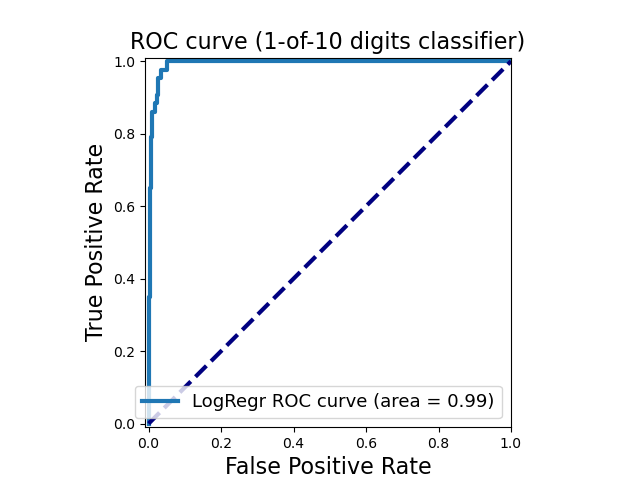

c:\users\rohit joshi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [69]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(x, y_binary, random_state=0)

y_score_lr = model_lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

<IPython.core.display.Javascript object>


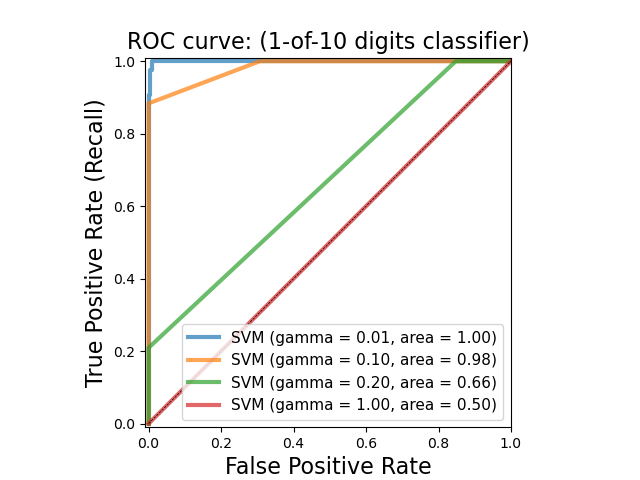

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


c:\users\rohit joshi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [70]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(x, y_binary, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.axes().set_aspect('equal')

plt.show()

## Multi class evaluation

<IPython.core.display.Javascript object>


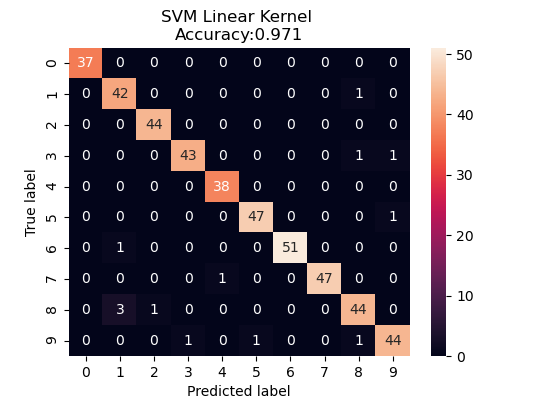

<IPython.core.display.Javascript object>


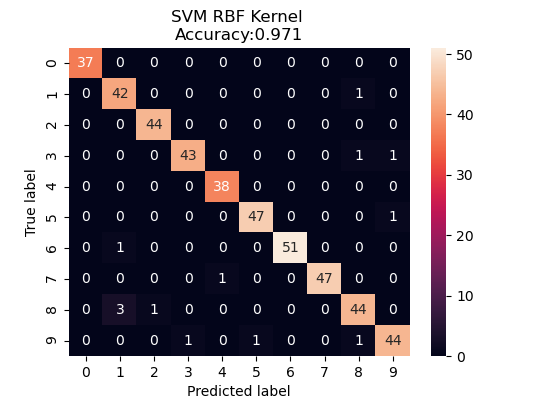

In [12]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_rb = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [21]:
print(classification_report(y_test_mc,svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



# micro vs macro 

In [15]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged precision = 0.99 (treat instances equally)
Macro-averaged precision = 0.99 (treat classes equally)


In [16]:
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test_mc, svm_predicted_mc, average = 'macro')))

Micro-averaged f1 = 0.99 (treat instances equally)
Macro-averaged f1 = 0.99 (treat classes equally)


## Evaluation for regression

Mean squared error for LM is 4646.740446731377
Mean squared error for dummy is 4965.126471649221
R2 score for Linear model is 0.0639900663961489
R2 score for dummy is -0.00014359578276068596
Lm coeffficient for linear model is [-698.80206267]


<IPython.core.display.Javascript object>


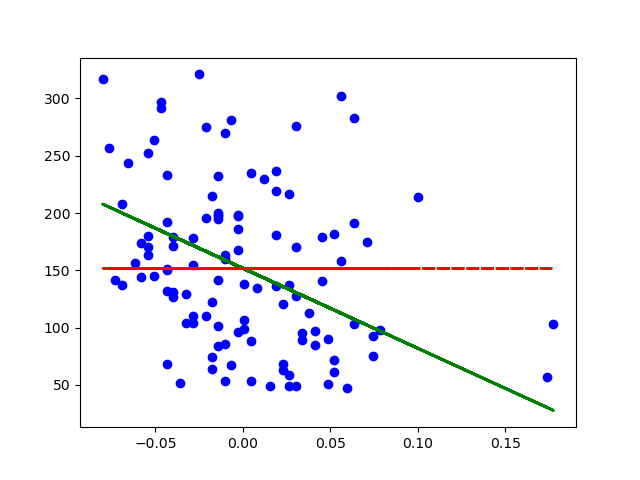

In [37]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

Xtrain, Xtest, ytrain, ytest=  train_test_split(X,y,random_state =0)

lm = LinearRegression().fit(Xtrain, ytrain)
lm_dummy = DummyRegressor(strategy ='mean').fit(Xtrain, ytrain)

y_predict= lm.predict(Xtest)
y_predict_dummy = lm_dummy.predict(Xtest)

print("Mean squared error for LM is {}".
     format(mean_squared_error(ytest, y_predict)))
print("Mean squared error for dummy is {}".
     format(mean_squared_error(ytest, y_predict_dummy)))
print("R2 score for Linear model is {}".
     format(r2_score(ytest, y_predict)))
print("R2 score for dummy is {}".
     format(r2_score(ytest, y_predict_dummy)))

print("Lm coeffficient for linear model is {}".
     format(lm.coef_))

#plot outputs
plt.figure()
plt.scatter(Xtest,ytest,color='blue')
plt.plot(Xtest, y_predict, color='green',linewidth=2)
plt.plot(Xtest, y_predict_dummy,color='red',linestyle='dashed', linewidth=2,label='dummy')
plt.show()


## Model selection using evaluation matrix( Classification)

In [39]:


from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()
# again, making this a binary problem with 'digit 1' as positive class 
# and 'not 1' as negative class
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel='linear', C=1)


print("CV score for default scoring is {}".format(cross_val_score(clf,X,y,cv=5)))
print("CV score for roc-auc scoring is {}".format(cross_val_score(clf,X,y,cv=5,scoring='roc_auc')))
print("CV score for recall scoring is {}".format(cross_val_score(clf,X,y,cv=5,scoring='recall')))

CV score for default scoring is [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
CV score for roc-auc scoring is [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
CV score for recall scoring is [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


# grid search in evaluation

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

datasets=load_digits()
X, y = datasets.data, datasets.target==1

X_train, X_test , y_train, y_test  =train_test_split(X,y, random_state = 0)

clf  =SVC(kernel = 'rbf')
grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

#default metric
grid_clf = GridSearchCV(clf, param_grid =grid)
grid_clf.fit(X_train, y_train)
y_decision_score  = grid_clf.decision_function(X_test)

print('Grid best parameter (max. accuracy): ', grid_clf.best_params_)
print('Grid best score (accuracy): ', grid_clf.best_score_)

# auc metric
grid_clf_auc  = GridSearchCV(clf, param_grid =grid,scoring='roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_score  = grid_clf_auc.decision_function(X_test)

print('Grid best parameter  (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score  (AUC): ', grid_clf_auc.best_score_)

Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy):  0.9985157648354676
Grid best parameter  (max. AUC):  {'gamma': 0.001}
Grid best score  (AUC):  1.0


# Optimising a classifier using different evaluation metrix

<IPython.core.display.Javascript object>


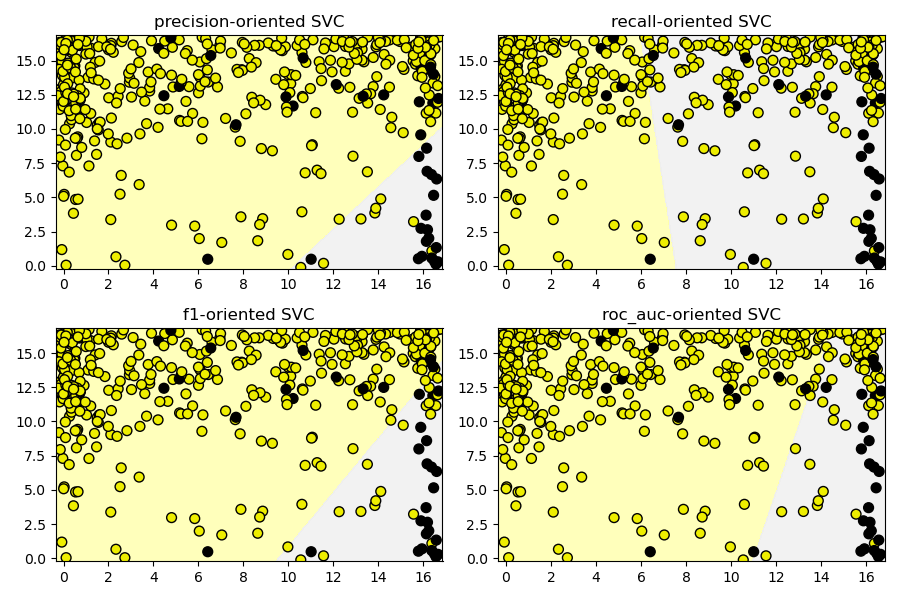

Grid best parameter (max. precision): {'class_weight': {1: 2}}
Grid best score (precision): 0.5290278637770898
Grid best parameter (max. recall): {'class_weight': {1: 50}}
Grid best score (recall): 0.9214285714285714
Grid best parameter (max. f1): {'class_weight': {1: 3}}
Grid best score (f1): 0.5283809336383689
Grid best parameter (max. roc_auc): {'class_weight': {1: 4}}
Grid best score (roc_auc): 0.8931498164994958


In [50]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# Create a two-feature input vector matching the example plot above
# We jitter the points (add a small amount of random noise) in case there are areas
# in feature space where many instances have the same features.
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel = 'linear').fit(X_twovar_train, y_train)
grid_values = {'class_weight':['balanced', {1:2},{1:3},{1:4},{1:5},{1:10},{1:20},{1:50}]}
plt.figure(figsize=(9,6))
for i, eval_metric in enumerate(('precision','recall', 'f1','roc_auc')):
    grid_clf_custom = GridSearchCV(clf, param_grid=grid_values, scoring=eval_metric)
    grid_clf_custom.fit(X_twovar_train, y_train)
    print('Grid best parameter (max. {0}): {1}'
          .format(eval_metric, grid_clf_custom.best_params_))
    print('Grid best score ({0}): {1}'
          .format(eval_metric, grid_clf_custom.best_score_))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plot_class_regions_for_classifier_subplot(grid_clf_custom, X_twovar_test, y_test, None,
                                             None, None,  plt.subplot(2, 2, i+1))
    
    plt.title(eval_metric+'-oriented SVC')
plt.tight_layout()
plt.show()

# precision recall curve for default svc

<IPython.core.display.Javascript object>


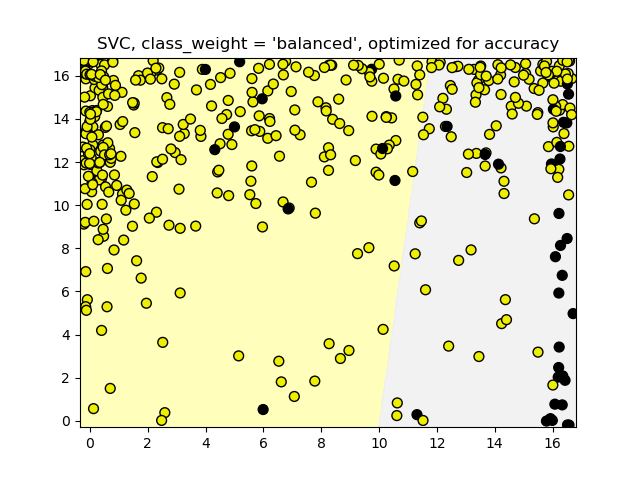

<IPython.core.display.Javascript object>


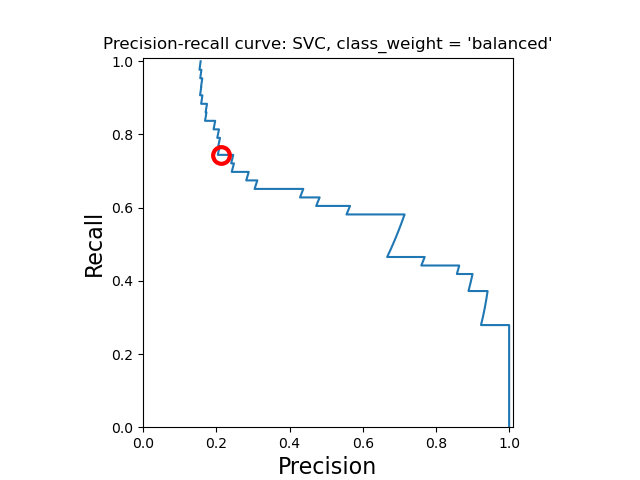

At zero threshold, precision: 0.21, recall: 0.74


c:\users\rohit joshi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from adspy_shared_utilities import plot_class_regions_for_classifier
from sklearn.svm import SVC

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create a two-feature input vector matching the example plot above
jitter_delta = 0.25
X_twovar_train = X_train[:,[20,59]]+ np.random.rand(X_train.shape[0], 2) - jitter_delta
X_twovar_test  = X_test[:,[20,59]] + np.random.rand(X_test.shape[0], 2) - jitter_delta

clf = SVC(kernel='linear', class_weight='balanced').fit(X_twovar_train, y_train)

y_scores = clf.decision_function(X_twovar_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plot_class_regions_for_classifier(clf, X_twovar_test, y_test)
plt.title("SVC, class_weight = 'balanced', optimized for accuracy")
plt.show()

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.title ("Precision-recall curve: SVC, class_weight = 'balanced'")
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize=12, fillstyle='none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()
print('At zero threshold, precision: {:.2f}, recall: {:.2f}'
      .format(closest_zero_p, closest_zero_r))